# Repetitive Clicking Motion Injuries
### How to avoid them and free yourself by automating common tasks using...

<img src='./img/PyAPI.png'/>

<img src='./img/repetitive_clicking_motion.gif'/>

<img src='./img/sample_service.png'/>

In [5]:
sample_service = server.services.list()[0]
print("{}\n-----------------\n{}".format(
    sample_service.properties["serviceName"],
    sample_service.properties["description"]))

SampleWorldCities
-----------------
The SampleWorldCities service is provided so you can quickly and easily preview the functionality of the GIS server. Click the thumbnail image to open in a web application. This sample service is optional and can be deleted.


In [6]:
def print_service_status(service):
    print("Current status of service '{}': {}".format(
        sample_service.properties["serviceName"],
        sample_service.status["realTimeState"]))

print_service_status(sample_service)

Current status of service 'SampleWorldCities': STARTED


In [7]:
outcome = sample_service.stop()
print("Stopping service '{}' {}".format(sample_service.properties["serviceName"],
                                        "Succeeded" if outcome else "Failed"))
print_service_status(sample_service)

Stopping service 'SampleWorldCities' Succeeded
Current status of service 'SampleWorldCities': STOPPED


In [8]:
outcome = sample_service.start()
print("Starting service '{}' {}".format(sample_service.properties["serviceName"],
                                        "Succeeded" if outcome else "Failed"))
print_service_status(sample_service)

Starting service 'SampleWorldCities' Succeeded
Current status of service 'SampleWorldCities': STARTED


In [3]:
messages = server.logs.query(datetime.datetime.now().isoformat(),
                             level="SEVERE")["logMessages"]
messages[:2]

[{'code': 20010,
  'elapsed': '',
  'machine': '10.0.0.250',
  'message': 'Error executing tool. CreateBuffers Job ID: jded85941342647cf9aa6550897d34af1 : {"messageCode": "AO_100012", "message": "CreateBuffers failed."}\nFailed to execute (CreateBuffers).',
  'methodName': 'GPServerSync.CheckMessages',
  'process': '31221',
  'source': 'System/SpatialAnalysisTools.GPServer',
  'thread': '81',
  'time': 1519888394800,
  'type': 'SEVERE',
  'user': 'arcgis_python'},
 {'code': 500000,
  'elapsed': '',
  'machine': '10.0.0.250',
  'message': 'Table not registered [db_60vw8.hsu_a635a.Fire_Buffers_2018_03_01_16_12_53_Fire_Buffers_2018]',
  'methodName': '',
  'process': '31221',
  'source': 'System/SpatialAnalysisTools.GPServer',
  'thread': '81',
  'time': 1519888394291,
  'type': 'SEVERE',
  'user': 'arcgis_python'}]

In [11]:
grouped_messages[23836]

[{'code': 23836,
  'elapsed': '',
  'machine': '10.0.0.250',
  'message': 'The maximum number of records allowed has been exceeded.',
  'methodName': 'Generate',
  'process': '27046',
  'source': 'System/PublishingTools.GPServer',
  'thread': '75',
  'time': 1516300916506,
  'type': 'SEVERE',
  'user': 'arcgis_python'},
 {'code': 23836,
  'elapsed': '',
  'machine': '10.0.0.250',
  'message': "Failed to connect to the server.: ERROR: In-server connection failed. Server is federated but server environment doesn't have a referer.",
  'methodName': 'pubSD.execute',
  'process': '31406',
  'source': 'System/PublishingTools.GPServer',
  'thread': '90',
  'time': 1513116850188,
  'type': 'SEVERE',
  'user': '0123456789ABCDEF::arcgis_python'}]

In [10]:
from itertools import groupby

#Group messages by their error code
grouped_messages = {}
for key, group in groupby(messages, lambda x: x["code"]):
    if key in grouped_messages:
        grouped_messages[key].append(list(group)[0])
    else:
        grouped_messages[key] = [list(group)[0]]

#Display the frequency of displayed messages
for key in grouped_messages:
    print("Error code {} reported {} times".format(key, len(grouped_messages[key])))

Error code 20010 reported 82 times
Error code 500000 reported 78 times
Error code 9000 reported 7 times
Error code 6602 reported 12 times
Error code 9003 reported 4 times
Error code 9016 reported 4 times
Error code 23836 reported 2 times
Error code 17103 reported 1 times
Error code 50000 reported 2 times


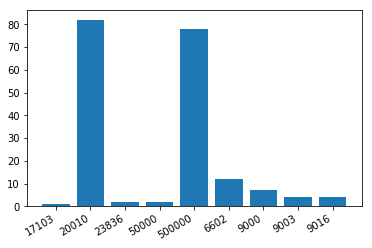

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.bar(list(str(x) for x in grouped_messages.keys()),
        list(len(x) for x in grouped_messages.values()))
fig.autofmt_xdate() #format x axis
plt.show()

<img src='./img/IDE_example.png'/>

<img src='./img/standalone_script_demo.gif'/>

<img src='./img/jenkins_overview.gif'/>

<img src='./img/jenkins_notify.png'/>

# Questions?

### Reference

Source: https://enterprise.arcgis.com/en/server/10.3/administer/linux/log-codes-overview.htm

Log code number ranges are associated with certain types of messages.

 * Codes below 10,000 are logged by the core framework of ArcGIS Server.
 * Codes between 10,000 and 100,000 pertain to services.
 * Codes above 100,000 are core ArcObjects component-related messages that may also be used in ArcGIS Engine or ArcGIS for Desktop.

Log code range | Message content
---------------|----------------
0-9999 | Core ArcGIS Server framework
10000–10999 | Map services
11000–11999 | Mobile data services
12000–12999 |KML services
13000–13999 | Network Analysis services
14000–14999 | WFS services created from map services
15000–15999 | WCS services created from map services
16000–16999 |WMS services created from map services
17000–19999 | Feature services
20000–20999 | Geoprocessing services
21000–21999 | Synchronous geoprocessing services
30000–30999 | Globe services
60000–60999 | Geometry services
70000–70999 | Geocode services
... | ...
100000–100999 | System
101000–101999 | Geometry
102000–102999 |Geodatabase
103000–103999 | Carto
104000–104999 | Display
105000–105999 | Output
106000–106999 | Geoprocessing
107000–107999 | Globe
108000–108999 | 3D
109000–109999 | Network Analyst
110000–110999 | ArcGIS Data Store